<a href="https://colab.research.google.com/github/SuzukiYusuke256/Robocup/blob/suzuki/Robocup_0512.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

90.0


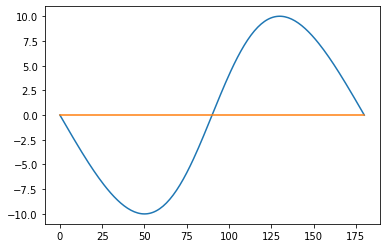

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

# direction = 0


def calc_direction(direction):

    attached_degree = [50, 130, 230, 310]
    force = [0, 0, 0, 0]
    x = [0, 0, 0, 0]
    y = [0, 0, 0, 0]
    for i in range(len(attached_degree)):
        force[i] = 100*math.sin(math.radians(direction - attached_degree[i]))
        x[i] = -force[i]*math.sin(math.radians(attached_degree[i]))
        y[i] = force[i]*math.cos(math.radians(attached_degree[i]))

    x_sum = 0
    y_sum = 0
    for i in range(len(x)):
        x_sum = x_sum + x[i]
        y_sum = y_sum + y[i]

    return math.degrees(math.atan2(y_sum, x_sum))

# print('x:{}, y:{}'.format(x_sum, y_sum))
print(calc_direction(90))

t = np.linspace(0,180, 181)
y = [0]*181
for i in range(len(t)):
    y[i] = calc_direction(t[i])-t[i]

plt.plot(t,y)
plt.plot(t,[0]*181)
plt.show()




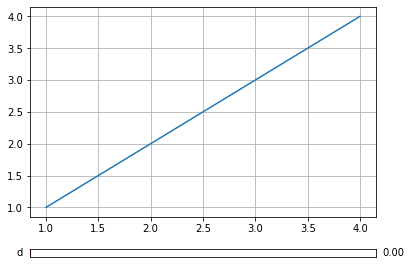

In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider


# xとyの値を生成
x = np.arange(1, 5)
y = x

# グラフ描画位置の設定
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.1, bottom=0.15)
    
# グラフ描画
plt.grid()
graph, = plt.plot(x, y)

def threshold_update(slider_val):
    y = x + slider_val
    # xとyの値を更新
    graph.set_xdata(x)
    graph.set_ydata(y)
    # グラフの再描画
    fig.canvas.draw_idle()
    
# スライダーの表示位置
slider_pos = plt.axes([0.1, 0.01, 0.8, 0.03])

# Sliderオブジェクトのインスタンス作成
threshold_slider = Slider(slider_pos, 'd', 0, 2, valinit=0)

# スライダーの値が変更された場合の処理を呼び出し
threshold_slider.on_changed(threshold_update)

# グラフ表示
plt.grid()
plt.show()



In [25]:
import math 
import numpy as np
import matplotlib.pyplot as plt

#@title データ{run: "auto"}
theta_deg = 58 #@param {type:"slider", min:0, max:360, step:1}
#@title データ{run: "auto"}
F4 = 43 #@param {type:"slider", min:0, max:60, step:1}

motor_theta = [math.radians(50), math.radians(130), math.radians(230), math.radians(310)]
theta4 = math.radians(310)
theta = math.radians(theta_deg)

F0 = 60

F = [0, 0, 0, F4]

A = [[math.cos(motor_theta[0]), math.cos(motor_theta[1]), math.cos(motor_theta[2])],
     [math.sin(motor_theta[0]), math.sin(motor_theta[1]), math.sin(motor_theta[2])],
     [1, 1, 1]]

b = [F0*math.cos(motor_theta[0])-F4*math.cos(theta4), F0*math.sin(motor_theta[0])-F4*math.sin(theta4), -F4]

detA = np.linalg.det(A)

# F1を計算する
a1 = [[math.cos(theta), math.cos(motor_theta[1]), math.cos(motor_theta[2])],
      [math.sin(theta), math.sin(motor_theta[1]), math.sin(motor_theta[2])],
      [0, 1, 1]]

b1 = [[math.cos(motor_theta[3]), math.cos(motor_theta[1]), math.cos(motor_theta[2])],
      [math.sin(motor_theta[3]), math.sin(motor_theta[1]), math.sin(motor_theta[2])],
      [1, 1, 1]]

F[0] = 1/detA*(F0*np.linalg.det(a1)-F4*np.linalg.det(b1))

# F2を計算する
a2 = [[math.cos(motor_theta[0]), math.cos(theta), math.cos(motor_theta[2])],
      [math.sin(motor_theta[0]), math.sin(theta), math.sin(motor_theta[2])],
      [1, 0, 1]]

b2 = [[math.cos(motor_theta[0]), math.cos(motor_theta[3]), math.cos(motor_theta[2])],
      [math.sin(motor_theta[0]), math.sin(motor_theta[3]), math.sin(motor_theta[2])],
      [1, 1, 1]]

F[1] = 1/detA*(F0*np.linalg.det(a2)-F4*np.linalg.det(b2))

# F3を計算する
a3 = [[math.cos(motor_theta[0]), math.cos(motor_theta[1]), math.cos(theta)],
      [math.sin(motor_theta[0]), math.sin(motor_theta[1]), math.sin(theta)],
      [1, 1, 0]]

b3 = [[math.cos(motor_theta[0]), math.cos(motor_theta[1]), math.cos(motor_theta[3])],
      [math.sin(motor_theta[0]), math.sin(motor_theta[1]), math.sin(motor_theta[3])],
      [1, 1, 1]]

F[2] = 1/detA*(F0*np.linalg.det(a3)-F4*np.linalg.det(b3))

# print(F1)
# print(F2)
# print(F3)

# 角度計算
x = 0
y = 0

for i in range(4):
    x += F[i]*math.cos(motor_theta[i])
    y += F[i]*math.sin(motor_theta[i])

print(math.degrees(math.atan2(y, x)))



58.00000000000002


4
